# <center>Рекомендательные системы
Методы построения рекомендательных систем можно представить следующим образом:

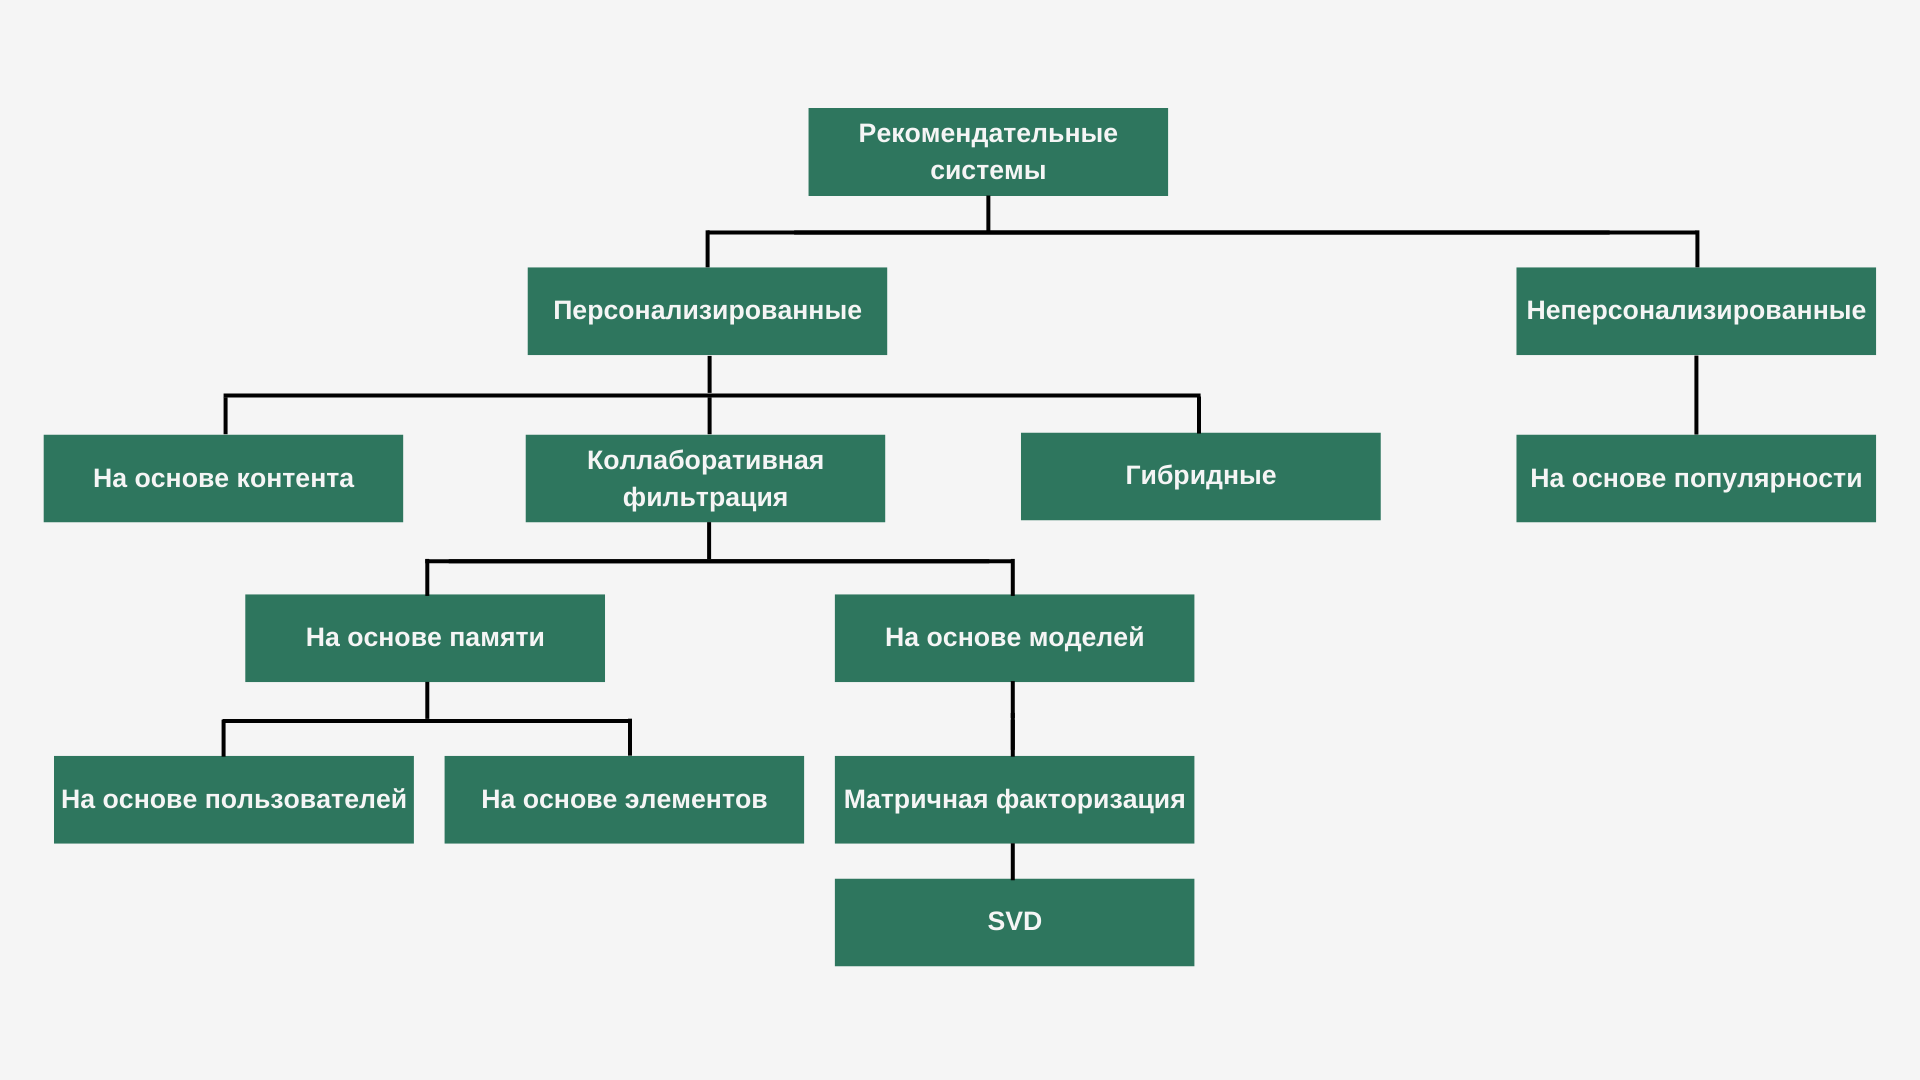

# <center>Данные для рекомендательной системы
Существует два способа сбора данных для рекомендательных систем — **явный** (англ. *explicit feedback, explicit ratings*) и **неявный** (англ. *implicit feedback, implicit ratings*). Далее мы рассмотрим оба подхода и связанные с ними проблемы.

# <center>Явный сбор данных (Explicit feedback)
В рамках явного сбора данных получают ту информацию, которую передают сами пользователи, например это оценки фильмов на *Netflix* или товаров на *Amazon*. Явные отзывы учитывают мнение пользователя о том, насколько ему понравился или не понравился продукт. Данные явных отзывов легко поддаются количественной оценке.

Однако использование таких данных сопряжено с рядом **проблем**:
* После сбора явных отзывов вы с большой вероятностью получите набор оценок **с ярко выраженной полярностью**.

    Когда вы последний раз оставляли отзыв на какой-то товар или фильм? Очень часто люди ставят оценку только в случае, если что-либо вызвало у них очень сильные эмоции, преимущественно негативные.

* Явные отзывы **не учитывают контекст**, в котором был оценён тот или иной продукт.

    Допустим, вам срочно нужно подтянуть уровень английского, чтобы пройти собеседование. Вы находите отличный самоучитель и ставите ему наивысшую оценку. Однако это вовсе не значит, что теперь для вас релевантны рекомендации учебников по иностранным языкам.

* Также есть **сложности с выстраиванием системы оценок**: необходимо придумать такую шкалу, чтобы пользователям было легко выражать своё мнение и это действие не вызывало у них раздражение.

Обычно данные с явной обратной связью выглядят следующим образом:  
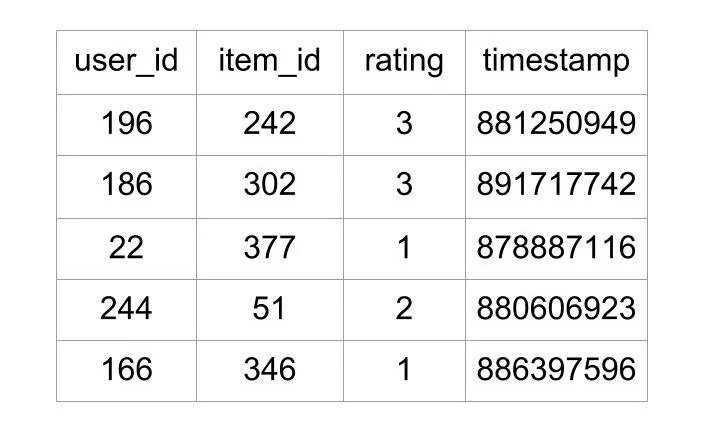

Здесь есть некоторый *id* пользователя (*user_id*), *id* оцениваемого этим пользователем продукта (*item_id*), выставленный рейтинг (*rating*) и некоторая дополнительная информация, например временная отсечка (*timestamp*).

В качестве *timestamp* здесь фиксируется часто используемый показатель, отражающий количество секунд, прошедших с 1 января 1970 года.

# <center>Неявный сбор данных (Implicit feedback)
Неявная обратная связь не отражает непосредственный интерес пользователя, но действует как косвенный показатель этого интереса.

Примерами неявных данных являются история просмотров, клики по ссылкам, подсчёт количества проигрываний песни, процент прокрутки веб-страницы или даже движение курсора по странице. Такие данные собирают практически все интернет-сервисы. Любая социальная сеть (ВК, TikTok и т. д.) регистрируют все возможные действия пользователя.

Объёмы данных неявной обратной связи огромны, и их легко собирать, ведь они не требуют дополнительных действий от пользователя — как только вы получаете разрешение пользователя на сбор его данных, вы можете спокойно использовать информацию о его действиях.

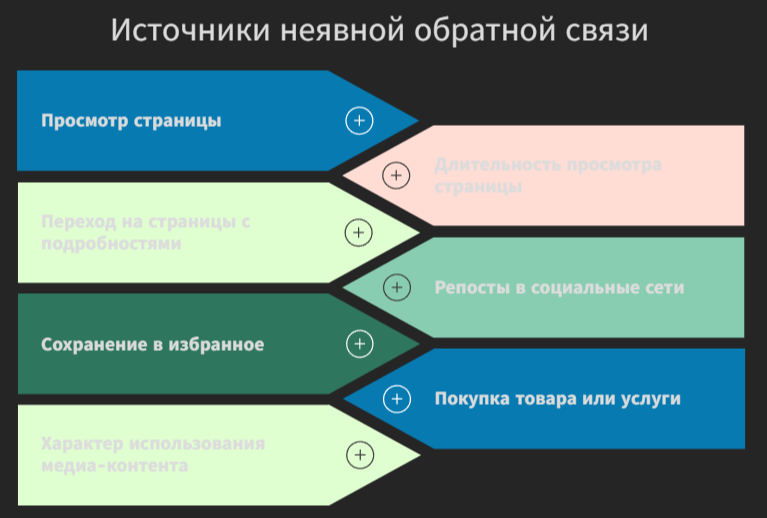

Также стоит упомянуть о некоторых особенностях неявных данных:

* **Отсутствие прямого измерения негативных предпочтений.**

    В отличие от явных отзывов, когда пользователь ставит плохую оценку, у нас нет прямого способа измерить негативное отношение пользователя к продукту. Если пользователь много раз слушает одну и ту же песню, мы можем сделать вывод, что она ему нравится, и посоветовать похожую. Однако если какую-то песню он вообще не слушает, это не значит, что он негативно к ней относится — возможно, он даже не знает о её существовании. Таким образом, через неявные реакции мы можем точно оценивать лишь положительное отношение.

* **Возможность делать верные выводы по численному выражению обратной связи.**

    Если выразить неявную обратную связь в численном эквиваленте, мы сможем однозначно определять, насколько какой-то товар или контент привлекают пользователя. К примеру, если человек слушает Бетховена намного больше, чем песни группы Rammstein, то мы можем сделать вывод, что произведения Бетховена привлекают его больше.

* **Большой объём зашумлённых данных.**

    Прежде чем использовать данные неявной обратной связи для построения рекомендательной системы, придётся потратить много времени на их предобработку.



# <center>Метрики в рекомендательных системах
## <center>Офлайн-метрики
Существует несколько категорий офлайн-метрик:

* **Prediction Accuracy** — оценка точности предсказываемого рейтинга.
* **Decision Support** — оценка релевантности рекомендаций.
* **Rank Accuracy** — оценка качества рекомендаций с учётом ранжирования.

### **Prediction accuracy**
Метрики *Prediction Accuracy* сравнивают прогнозируемые значения рейтинга с реальными оценками пользователей. Для того чтобы количественно оценить схожесть фактических и предсказанных данных, обычно используются уже знакомые вам метрики *MAE*, *MSE* и *RMSE*.

### **Decision support**
По результатам построения рекомендательной системы мы можем создать матрицу ошибок, которая будет выглядеть следующим образом:

||RELEVANT|NOT RELEVANT|
|-|-|-|
|Recommended|True Positive (TP)|False Positive (FP)|
|Not recommended|False Negative (FN)|True Negative (TN)|

и рассчитать интересующие нас метрики:
$ \text{Precision}: P, \space \text{Recall}: R $

Однако при вычислении этих метрик мы совершенно не учитываем ранжирование рекомендаций, хотя должно иметь значение, определены правильно самые первые рекомендации (например, те фильмы, которые понравятся пользователю в первую очередь и заслужат у него наивысшие оценки) или лишь последние. Чтобы преодолеть эту проблему, эти метрики используются с отсечением $k$ рекомендаций.

*Precision* и *recall* в точке отсечения $k$, $P@k$ и $R@k$ — это просто *precision* и *recall*, рассчитанные с учётом только подмножества рекомендаций от ранга $1$ до $k$.

К примеру, ниже представлены расчёты для $P@3$ (*precision* c отсечением $3$) и $P@5$ (*precision* с отсечением $5$):

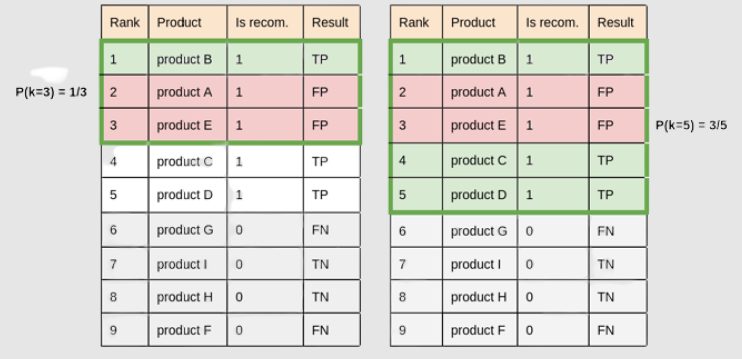

В таблице слева мы отсекаем до $k=3$, поэтому берём только первые три рекомендации. Среди них рекомендованы все три продукта (значение $1$ в столбце “Is recom.”). Мы видим, что лишь одна рекомендация сделана корректно (значение TP в столбце “Result”). Поэтому показатель $P@3=\frac{1}{3}$.

В примере справа мы отсекаем до $k=5$, поэтому отбираем первые пять рекомендаций. Из них все пять рекомендованы пользователю и три сделаны верно. Поэтому показатель $P@5=\frac{3}{5}$.

Теперь рассмотрим вычисление метрики *recall* с отсечением.

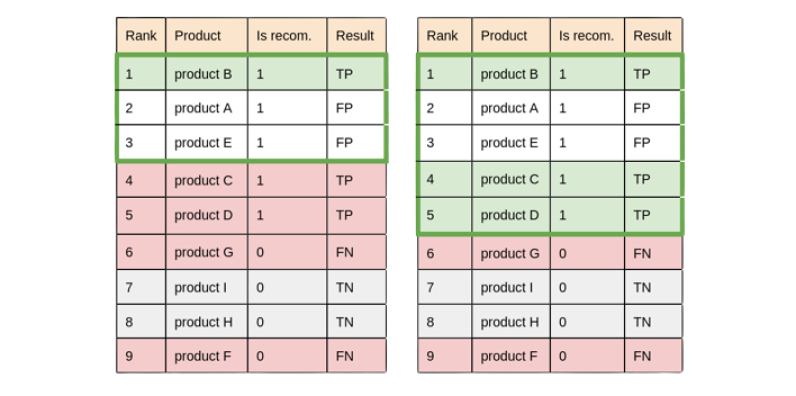

В данной таблице зелёным выделены релевантные рекомендации, белым — нерелевантные.

Среди трёх рекомендаций в таблице слева есть лишь один релевантный продукт, и он подобран верно. Поэтому $R@3=1$.

Среди пяти рекомендаций в таблице справа есть три релевантных объекта, и все они верно определены. Так что получаем также $R@5=1$.

### **Rank accuracy**
Рекомендательные системы должны быть способны помещать наиболее релевантные элементы на высокие позиции в списке рекомендаций. Первый рекомендуемый элемент всегда самый важный, следующий — второй по важности и т. д.

Сейчас мы рассмотрим метрики, которые как раз учитывают положение продукта в рейтинге:

* *MRR (Mean Reciprocal Rank)*;
* *MAP (Mean Average Precision)*;
* *NDCG (Normalized Discounted Cumulative Gain)*.
#### **MRR (средний реципрокный ранг)**
Это самая простая метрика из трёх перечисленных. Она определяет, где среди рекомендованных находится первый релевантный элемент.

В общем виде формулу для этой метрики можно записать следующим образом:
$$ \text{MRR}=\frac{1}{|Q|}\sum^{|Q|}_{i=1}\frac{1}{\text{rank}_i} $$
Здесь:

* $|Q|$ — общее количество запросов;
* $\text{rank}_i$ — позиция первого релевантного элемента для $i$-го запроса.

Ниже представлен пример вычисления *MRR*. Для каждого пользователя мы находим первый релевантный элемент и вычисляем, сколько элементов к этому моменту уже было предложено пользователю. Далее делим $1$ на это количество. После этого находим среднее арифметическое для всех полученных долей.

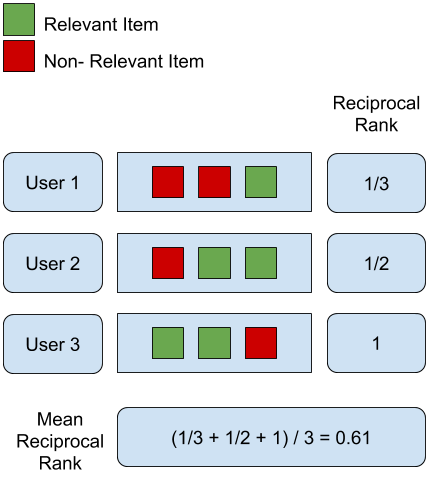

|Преимущества|Недостатки|
|-|-|
|Метод прост в вычислениях и легко интерпретируется.|Метрика фокусируется на одном элементе из списка и не оценивает остальные рекомендуемые элементы.|
|Метод уделяет большее внимание первому релевантному элементу списка, что в целом отражает логику рекомендательных систем.|Список с одним релевантным элементом имеет такой же вес в вычислении итогового показателя, как и список с большим количеством релевантных элементов. Это не всегда хорошо.|
||Метрика плохо подходит для случаев, когда важно получить именно ряд рекомендаций, а не одну рекомендацию.|

Для вычисления *MRR* в *Python* рекомендуем использовать функцию `mean_reciprocal_rank()` из библиотеки [cute_ranking](https://github.com/ncoop57/cute_ranking).

#### **MAP (средняя точность)**
Допустим, у нас есть набор данных и мы хотим оценить весь список рекомендуемых элементов до определённого отсечения $N$, как мы делали, к примеру, с $P@N$. Метрика $P@N$ вычисляет долю рекомендаций, которые являются хорошими. Её недостатком является то, что она рассматривает весь список как набор элементов и одинаково относится ко всем ошибкам в рекомендуемом списке (т. е. неважно, ошиблись мы в первой рекомендации или в десятой). Нам же важно придать больший вес ошибкам в верхней части списка, а затем постепенно уменьшать их значимость по мере продвижения вниз по списку.

Метрика MAP помогает достичь этой цели:

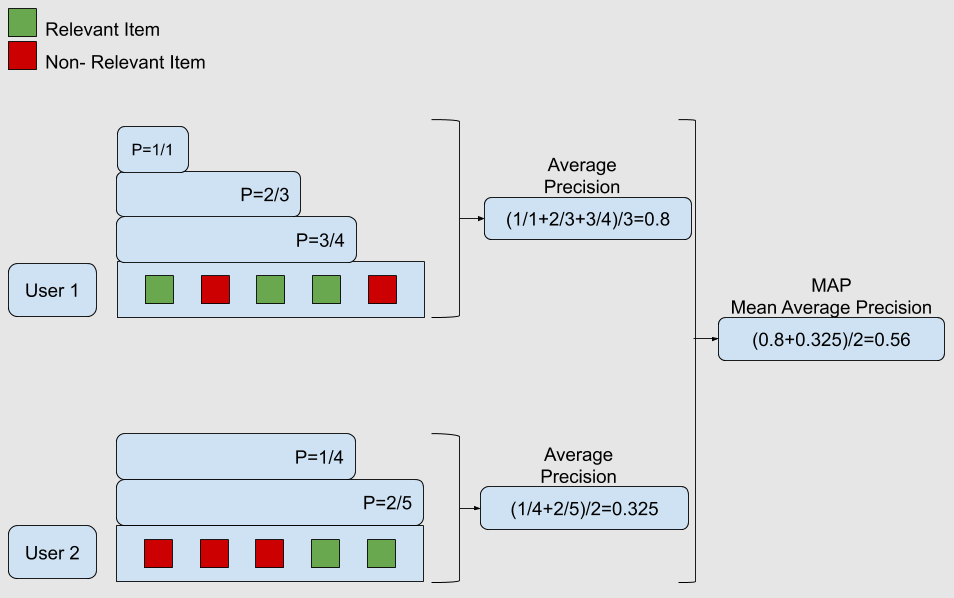

Для каждого пользователя мы вычисляем долю релевантных рекомендаций для всех возможных отсечений по релевантным элементам и далее усредняем для каждого пользователя получившиеся доли. Для итогового результата усредняем показатели по всем пользователям.

|Преимущества|Недостататки|
|-|-|
|Метрика естественным образом обрабатывает ранжирование списков рекомендованных элементов.|Метрика отлично подходит для бинарных (релевантных/нерелевантных) оценок, однако не подходит для рейтинговых числовых оценок.|
|Метрика способна придавать вес ошибкам пропорционально их месту в списке: больший вес — ошибкам в верхней части, меньший вес — ошибкам ниже по списку. Это соответствует необходимости показать как можно больше релевантных элементов в верхней части списка рекомендаций.||

#### **NDCG (нормализованный дисконтированный кумулятивный выигрыш)**
Подход к вычислению этой метрики схож с подходом к вычислению *MAP*: в обоих случаях высоко ценится выдача релевантных продуктов на первых позициях. Однако метрика *NDCG* позволяет использовать информацию о том, что разные продукты имеют разную степень релевантности, то есть учитывает их рейтинг.

Представим, что поисковая система выдаёт пять статей с именами *D1, D2, D3, D4, D5*, которые выводятся в таком же порядке. Определим шкалу релевантности (0–3), где:
* 0 — не релевантно;
* 1–2 — в некоторой степени релевантно;
* 3 — полностью релевантно.

Предположим, статьи имеют следующие оценки релевантности:
* D1 — 3;
* D2 — 2;
* D3 — 0;
* D4 — 0;
* D5 — 1.

Кумулятивный выигрыш представляет собой сумму этих оценок релевантности и может быть рассчитан как:
$$ CG = \sum^5_{i=1} (rel)_i = 3 + 2 + 0 + 0 + 1 = 6 $$
Здесь $rel$ — оценка релевантности документа.
Дисконтированный кумулятивный выигрыш можно рассчитать по формуле:
$$ DCG = \sum^5_{i=1} \frac{(rel)_i}{\log_2(i+1)} $$
Таким образом, дисконтированный кумулятивный выигрыш в приведённом выше примере составляет:
$$ DCG_5 = \frac{3}{\log_2(2)} + \frac{2}{\log_2(3)} + \frac{0}{\log_2(4)} + \frac{0}{\log_2(5)} + \frac{1}{\log_2(6)} \approx 4.67 $$
Теперь нам нужно расположить статьи в порядке убывания рейтинга и рассчитать DCG, чтобы получить рейтинг идеального дисконтированного кумулятивного выигрыша (IDCG):
$$ IDCG_5 = \frac{3}{\log_2(2)} + \frac{2}{\log_2(3)} + \frac{1}{\log_2(4)} + \frac{0}{\log_2(5)} + \frac{0}{\log_2(6)} \approx 4.76 $$
Рассчитаем нормализованный DCG по следующей формуле:
$$ nDCG = \frac{DCG_5}{IDCG_5} = \frac{4.67}{4.76} \approx 0.98 $$
Можно получить то же значение, если воспользоваться готовой функцией из модуля `sklearn`:
```py
from sklearn.metrics import ndcg_score, dcg_score
import numpy as np

y_true = np.asarray([[3, 2, 1, 0, 0]])
relevance = np.asarray([[3, 2, 0, 0, 1]])

print(ndcg_score(y_true, relevance))

#0.980840401274087

```


In [1]:
from sklearn.metrics import ndcg_score
import numpy as np
y_true = np.array([[2, 4, 1, 1, 1]])
y_pred = np.array([[2, 5, 2, 3, 1]])
ndcg_score(y_true, y_pred)

0.9748317848747132

# <center>Онлайн-метрики
Выделяют пять групп бизнес-показателей, на которые рекомендательные системы оказывают самое существенное влияние:

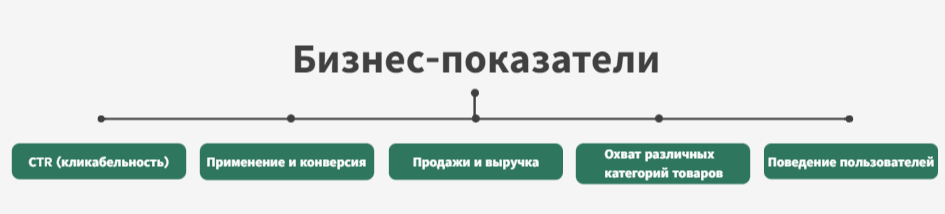

# <center>Проблема холодного старта и popularity-based model
Рекомендательные системы строятся на данных о товарах и о пользователях. Но что делать, если какой-то информации не хватает или если данных вообще нет?

В таком случае говорят о **проблеме холодного старта**. Требуется потратить немного времени или сделать несколько шагов, чтобы «разогреть» сервис рекомендаций, прежде чем он начнёт выдавать релевантные результаты с достаточной эффективностью.

Можно выделить два вида проблем холодного старта:
* проблема холодного старта пользователя;
* проблема холодного старта продукта.
## Холодный старт пользователя
Когда система сталкивается с новыми посетителями веб-сайта, не имеющими истории просмотров или известных предпочтений, создание персонализированного опыта для них становится сложной задачей, поскольку данные, обычно используемые для создания рекомендаций, отсутствуют.

Рекомендательные системы не могут дать корректную рекомендацию не только для тех, кто впервые заходит на сайт. Пользовательский «холодный старт» может возникнуть даже у постоянных посетителей, если их поведение и предпочтения меняются от одной сессии к другой. 
## Холодный старт продукта
Когда новый товар добавляется в интернет-магазин или когда свежий контент загружается на медиаплатформу, первое время о нём никто не знает. С нулевым количеством взаимодействий или оценок он практически невидим для рекомендательной системы независимо от того, насколько релевантным он будет для пользователей.
## Popularity-based model
Если к нам приходит клиент, про которого мы ничего не знаем, мы можем создать для него рекомендации с использованием *popularity-based*-модели. Это тип РС, которая формирует рекомендации на основе популярности продуктов. Например, если большинство людей часто покупает определённый продукт, то система знает, что он наиболее востребован среди аудитории, поэтому каждому новому пользователю, который только что зарегистрировался, система будет рекомендовать этот продукт.

|Преимущества|Недостатки|
|-|-|
|Не страдает от проблем холодного старта.|Не персонализирована (будет рекомендовать одинаковые продукты всем пользователям).|
|Нет необходимости в исторических данных для пользователя.||



# <center>Content-based модель
>Подход **content-based** предполагает, что пользователю рекомендуются товары или контент на основе его предпочтений и вкусов.

Профиль интересов пользователя формируется исходя из его оценок, а также неявной обратной связи: лайков, количества просмотров и так далее. В качестве рекомендаций пользователю предлагаются похожие* элементы.

\* <font size=2>Сходство или близость элементов измеряется на основе сходства содержания этих элементов. Говоря «содержание», мы имеем в виду такие сущности, как категория, тег, жанр и т. д., то есть метаданные.</font>

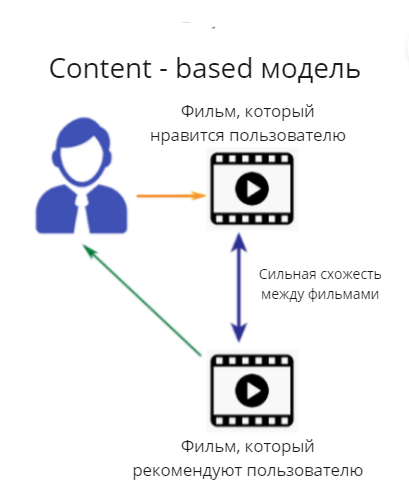

Допустим, пользователь Михаил выставил лайки и дизлайки для фильмов на одном из веб-сервисов:

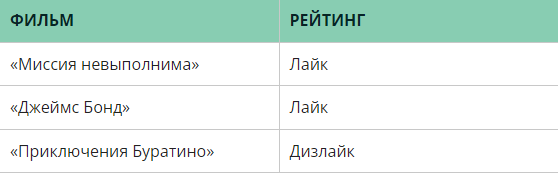

Предположим, что по правилам сервиса лайк прибавляет 4.5 балла к фильмам с таким жанром, а дизлайк вычитает 6 баллов. Теперь создадим вектор пользователя для Михаила на основе трёх его оценок:

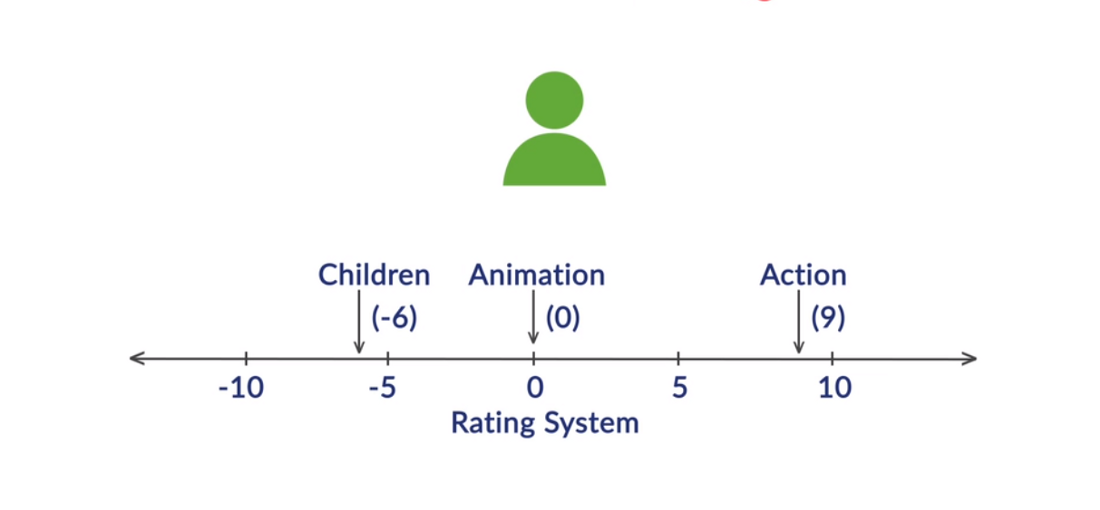

Присваиваем значение 9 боевикам, так как Михаил поставил лайк двум фильмам с жанром «боевик». Михаил не смотрел анимационные фильмы, так что присваиваем 0 анимации, и, поскольку он оставил плохой отзыв фильму в жанре «дети», присваиваем -6 детским фильмам.

Таким образом, вектор пользователя для Михаила — это $(9, 0, -6)$ для шкал (Боевик, Анимация, Дети).

Теперь попробуем предсказать отношение Михаила к фильмам, которые он ещё не смотрел, например «Звёздные войны» и «История игрушек».

«Звёздные войны» — это боевик, который не относится к анимации или детским фильмам, поэтому по шкалам (Боевик, Анимация, Дети) у этого фильма будут координаты $(1, 0, 0)$. У фильма «История игрушек» будут координаты $(0, 1, 1)$, так как он относится и к жанру детских фильмов, и к анимации.

Теперь нам необходимо найти произведения вектора пользователя и вектора фильма: чем больше будет скалярное произведение, тем более подходящим для Михаила будет фильм.

Скалярное произведение для «Истории игрушек» равно $-6$, а для «Звёздных войн» оно равно $9$. Следовательно, из этих двух вариантов именно «Звёздные войны» будут рекомендованы Михаилу, что вполне логично, ведь ему больше нравятся боевики.

Аналогично можно вычислить скалярные произведения векторов для всех фильмов на сайте и рекомендовать Михаилу десять наиболее подходящих фильмов.

В данном примере мы опирались лишь на схожесть фильмов по жанрам: скалярное произведение будет увеличиваться в том случае, если у фильма ненулевая координата для того жанра, который пользователь уже оценил положительно. Однако в реальности всё намного сложнее: например, мы можем использовать одновременно жанр фильма, теги, описание, актёров и т. д. Для этого случая нам нужен способ измерить сходство между набором параметров.

Рассмотрим два наиболее популярных метода измерения такого сходства:
* **индекс Жаккара**,
* **косинусная близость**.


## Индекс Жаккара
Индекс Жаккара измеряет сходство между двумя наборами A и B как мощность множества пересечения, делённую на мощность множества объединения каких-то характеристик объекта. Его удобно применять для категориальных признаков.
$$ J(A, B) = \frac{|A \cap B|}{|A \cup B|} = \frac{|A \cap B|}{|A| + |B| - |A \cap B|} $$
Например, с помощью индекса Жаккара мы можем оценить, насколько похожи фильмы, основываясь на наборах ключевых слов (тегов) для них:

* фильм А : `{фантастика, школа, романтика}`;
* фильм B : `{приключения, фантастика, школа}`;
* фильм C : `{ужасы, триллер, драма}`.

Мы можем предположить, что фильм A больше похож на фильм B, чем на фильм C, так как фильмы A и B имеют два общих тега (фантастика, школа), в то время как фильмы A и C не имеют ни одного общего тега.

Если бы мы рассматривали вычисление этого индекса для фильмов А и В, то получили бы $\frac{2}{4}$, так как в пересечении два тега, а в объединении — четыре.
## Косинусная близость
Подход с использованием индекса Жаккара помог нам создать интуитивное представление о том, что означает сходство набора категориальных значений. Подход с **косинусным сходством** немного сложнее и применяется для оценки близости массивов с числами. Он требует, чтобы мы представляли объекты в виде вектора.

Например, мы можем представить те же самые фильмы как набор из трёх вещественных чисел:
* фильм $ A=(1.1, 2.3, 5.1) $;
* фильм $ B=(1.3, 2.1, 4.9) $;
* фильм $ C=(5.1, 6.2, 1.1) $.

Глядя на эти векторы, кажется, что фильмы А и В похожи друг на друга больше, чем, например, фильмы А и С, так как координаты фильмов А и В очень близки и различаются гораздо меньше, чем координаты фильмов А и С.

Чтобы вычислить косинусную близость, нам понадобится следующая формула:

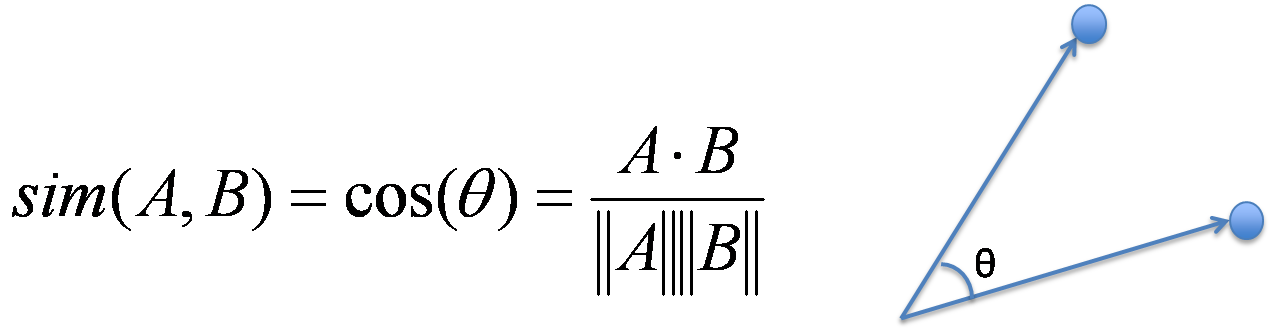

По сути, мы ищем угол между векторами. Если два вектора совпадут (т. е. будут максимально близкими), то угол между ними будет равен нулю, а значит, косинус будет равен $1$. Если векторы будут направлены в противоположные стороны, косинус будет равен $-1$. Таким образом, мы можем получить для любых двух векторов значение в пределах от $-1$ до $1$ включительно, по которому можно определить, насколько векторы близки друг к другу.

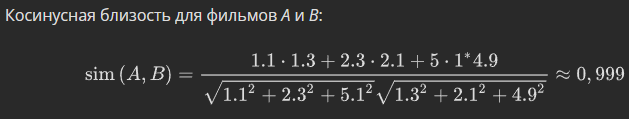

Вычислите косинусную близость между векторами А и С.

In [2]:
A = np.array([1.1, 2.3, 5.1])
C = np.array([5.1, 6.2, 1.1]).reshape(3, 1)
(A @ C) / (np.linalg.norm(A) * np.linalg.norm(C))

array([0.55149363])

Итак, чтобы построить рекомендательную систему на основе контента, необходимо:
1. Для каждого продукта создать характеризующие его признаки.
2. Найти показатель близости между всеми продуктами.
3. Порекомендовать пользователю продукты, которые показывают наибольшую близость с теми продуктами, которые он высоко оценил.

|Преимущества|Недостататки|
|-|-|
|**Для создания рекомендаций не требуются данные от других пользователей.** Как только пользователь выполнил поиск, просмотрел несколько продуктов и/или совершил несколько покупок, система фильтрации на основе контента может начать создавать соответствующие рекомендации. Это делает её идеальной для компаний и сервисов, у которых нет огромного количества пользователей для формирования выборки.|**Отсутствие новизны и разнообразия.** Вполне возможно, что человеку, который любит боевики, могли бы понравиться и фильмы ужасов. Однако мы не сможем ему их порекомендовать, если он сам не отметит подобные фильмы как понравившиеся.|
|**Рекомендации получаются очень релевантными для пользователя.** Рекомендации на основе контента могут быть в значительной степени адаптированы к интересам пользователя, включая рекомендации по нишевым товарам, поскольку метод основан на сопоставлении характеристик или атрибутов объекта базы данных с интересами пользователя.|**Присвоенные характеристики могут быть неверными.** Рекомендации на основе контента хороши настолько, насколько хороши атрибуты (характеристики), присвоенные продуктам.|
|**Рекомендации прозрачны для пользователя.** Высокорелевантные рекомендации создают ощущение понятности алгоритмов для пользователя, повышая уровень его доверия к предлагаемым рекомендациям.||
|**Вы избегаете проблемы «холодного старта».** Хотя фильтрация на основе контента требует первоначального ввода данных от пользователей, чтобы начать давать рекомендации, качество ранних рекомендаций обычно намного выше, чем у других подходов.||
|**Системы фильтрации на основе содержания обычно проще в создании.** Основная работа заключается в создании характеристик, на основании которых будет вычисляться близость.||


# <center>Коллаборативная фильтрация
Коллаборативная фильтрация основана на поиске сходства между пользователями или между продуктами. Используя этот метод, мы можем прогнозировать рейтинги на основе оценок похожих пользователей или похожих продуктов.

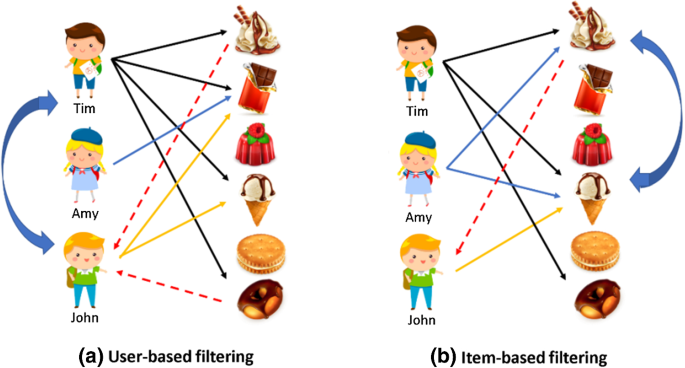

**Матрица предпочтений**

Чтобы её получить, расположим в матрице клиентов по строкам, а продукты — по столбцам. На пересечении строк и столбцов разместим оценки, поставленные клиентами соответствующим продуктам: первый клиент поставил второму товару 3, третий клиент поставил первому товару 2 и так далее.

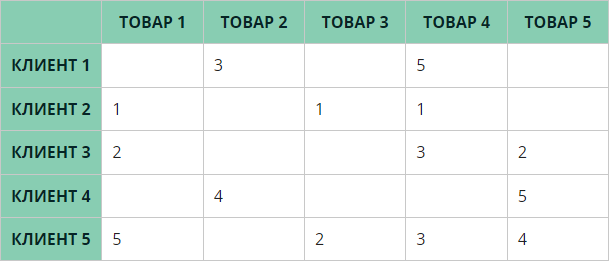

На основе этих данных мы можем разделить пользователей на кластеры. Чтобы это сделать, можно взять некоторую **меру близости (например, косинусная близость)** для пользователей по их истории оценок и на основе полученных значений объединить пользователей в кластеры таким образом, чтобы похожие пользователи оказались в одной группе, а сильно отличающиеся — в разных. В таком случае оценку пользователя для продукта можно прогнозировать как среднюю оценку пользователей этого кластера, оценивших этот продукт.

Таким образом, если нам необходимо предсказать, как конкретный пользователь оценил фильм, мы анализируем оценки, поставленные данному фильму пользователями, которые принадлежат к тому же кластеру, что и изучаемый пользователь, и усредняем эти оценки. Так получается предсказание оценки фильма для нашего пользователя.

В целом, такой подход можно применять, однако у него есть ряд существенных недостатков:
* **Нечего рекомендовать новым/нетипичным пользователям.** Если появляется пользователь, который ни на кого не похож, мы не знаем, к какому кластеру его отнести. На начальных стадиях мы определяем его в случайный кластер, и рекомендации в таком случае будут плохими.
* **Не учитывается специфика каждого пользователя.** По сути, мы выявляем некоторые паттерны поведения и предпочтений и для каждого паттерна выделяем свои рекомендации. Однако на самом деле даже пользователи из одного кластера немного отличаются друг от друга, поэтому возникают неточности.
* **Если оценок нет, то среднее арифметическое невозможно вычислить.** Если в кластере никто не оценивал объект, сделать предсказание не получится, так как для предсказания нужно вычислить среднее арифметическое для оценок.

# Коллаборативная фильтрация на основе памяти (memory-based)

Чтобы решить перечисленные выше проблемы, обратимся к коллаборативной фильтрации, а точнее к *memory-based*-подходу, основанному на близости пользователей (*user-based*).

При *memory-based*-подходе хранится полная матрица взаимодействий (лайков, просмотров и т. д.) пользователя с продуктом.
# Коллаборативная фильтрация на основе пользователей (*user-based*-подход)
>**Коллаборативная фильтрация на основе пользователей** — это метод, используемый для предсказания продуктов, которые могут понравиться пользователю, на основе оценок, выставленных этому продукту другими пользователями, имеющими схожие с целевым пользователем вкусы.

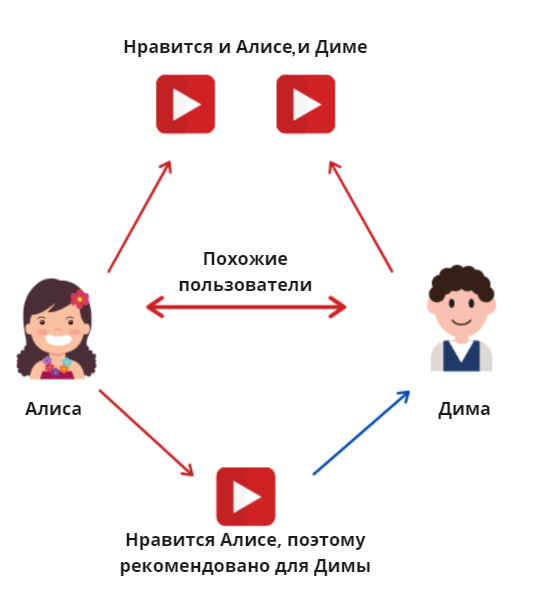

В этом алгоритме мы заменяем жёсткую кластеризацию на следующую формулу и получаем предсказанную оценку пользователя $u$, которую он поставил элементу $i$:
$$ \hat{r}_{ui} = \overline{r}_u + \frac{\sum_{v \in U_i} \text{sim}(u, v)(r_{vi} - \overline{r}_v)}{\sum_{v \in U_i} \text{sim}(u, v)} $$
Здесь используются следующие обозначения:
* $u$ и $v$ — индексы пользователей;
* $\hat{r}_u$ — средняя оценка пользователя $u$;
* $\hat{r}_v$ — средняя оценка пользователя $v$;
* $\text{sim}$ — функция схожести;
* $i$ — номер оцениваемого элемента.

Средняя оценка пользователя может быть никак не привязана к его интересам. По сути, это просто показатель того, как в среднем пользователь привык оценивать фильмы.

Оценка пользователя, которую мы предсказываем для него, состоит из **двух частей**:

* Непосредственно его средняя оценка.
* Слагаемое, состоящее из разницы в оценках с другими пользователями, т. е. похожести пользователей. Эта разница домножается на похожесть пользователей, то есть в числителе — **средневзвешенная разница в оценках**, а в знаменателе — **сумма показателей схожести**.

Каждому клиенту мы подбираем релевантный для него товар в рамках группы клиентов, но не решаем задачу кластеризации, а усредняем интересы данной группы в дистанции нескольких соседей. По сути, здесь мы руководствуемся идеей, что, например, видео можно порекомендовать человеку, если оно понравилось его друзьям.



***
В матрице четыре пользователя — Алиса, Рома, Катя и Женя. Они оценивают различные приложения из *AppStore*. Диапазон оценок — от 1 до 5. Знак '?' означает, что данный пользователь не оценил это приложение.

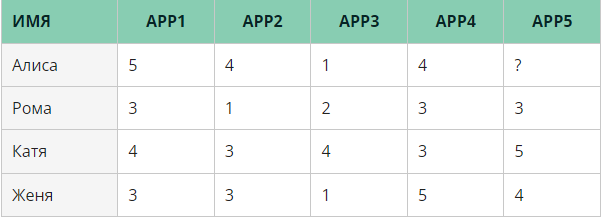

Вычислим сходство как коэффициент корреляции — такой подход также популярен.

Для начала найдём среднее значение рейтинга для каждого пользователя:
$$ \overline{r}_i = \frac{\sum_p r_{ip}}{\sum p} $$
Таким образом получаем:  
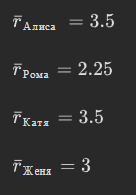

Теперь вычисляем сходство между Алисой и всеми остальными пользователями:  
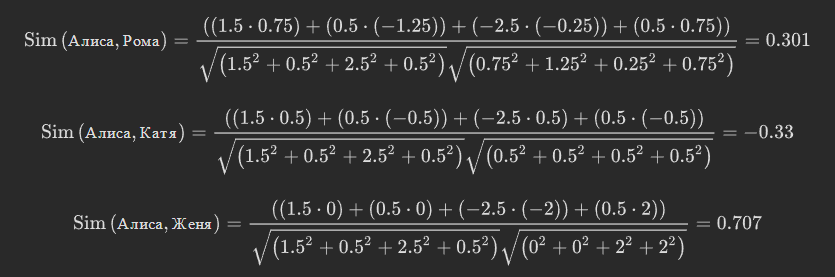

Теперь спрогнозируем рейтинг Алисы для приложения App5:  
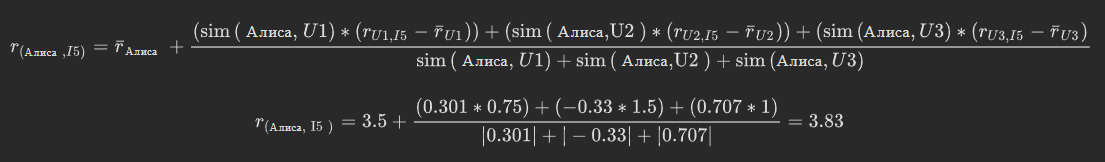

Итак, мы смогли реализовать предсказание для *user-based*-подхода
***

# Коллаборативная фильтрация на основе элементов (*item-based*-подход)
Если мы транспонируем матрицу предпочтений и будем решать ту же самую задачу не для пользователей, а для объектов (*items*), то получим аналогичную задачу, которая является *item-based*-моделью коллаборативной фильтрации и даёт нам возможность предсказывать оценку следующим образом:
$$ \hat{r}_{ui} = \overline{r}_i + \frac{\sum_{j \in I_u} \text{sim}(i, j)(r_{uj} - \overline{r}_j)}{\sum_{j \in I_u} \text{sim}(i, j)} $$
По формуле можно понять, что этот подход использует идею предыдущего, только теперь похожи не пользователи, а объекты. Возвращаясь к примеру с рекомендациями фильмов, теперь мы рекомендуем пользователю фильм, который похож на те фильмы, которые уже понравились этому пользователю ранее.

Кроме того, продуктов обычно больше, чем пользователей, поэтому векторы получатся большей размерности. Это даёт возможность получить более устойчивую модель с большей статистической значимостью.

Может показаться, что коллаборативная фильтрация в рамках *item-based*-подхода очень похожа на модель на основе контента. Однако это не так: *item-based*-модель рассматривает взаимодействия пользователей с продуктом, а *content-based*-модель — метаинформацию продукта.

**Преимущества и недостатки коллаборативной фильтрации, основанной на памяти (*memory-based*):**
|Преимущества|Недостатки|
|-|-|
|Может помочь пользователям обнаружить новые релевантные продукты из новых категорий, даже если пользователи не проявляют интерес к новым типам продуктов.|Нехватка данных может привести к трудностям при рекомендации новых продуктов или при появлении новых пользователей, поскольку предложения основаны на исторических данных и взаимодействии. Таким образом, для этого подхода актуальна проблема холодного старта.|
|Не требует подробных характеристик и контекстных данных о продуктах. По сути, для реализации нужна только матрица взаимодействий пользователей и продуктов.|По мере роста пользовательской базы алгоритмы страдают из-за большого объёма данных (очень ресурсоёмкие вычисления) и недостаточной масштабируемости.|
||Отсутствие разнообразия в долгосрочной перспективе. Это может показаться нелогичным, поскольку смысл коллаборативной фильтрации заключается в том, чтобы рекомендовать пользователю новые товары. Однако поскольку алгоритмы функционируют на основе исторических рейтингов, они не будут рекомендовать товары с небольшим количеством оценок или ограниченным количеством данных. Популярные товары будут более популярны в долгосрочной перспективе, а новых и разнообразных вариантов будет не хватать.|